## Exmaple Decision Tree Notebook

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Import Car Evaluation Datasetcar.names
# Refer https://archive.ics.uci.edu/ml/machine-learning-databases/car/
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header=None)

In [3]:
df.shape

(1728, 7)

In [4]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
# Rename Columns
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.sample()

,buying,maint,doors,persons,lug_boot,safety,class
1465,low,high,4,2,big,med,unacc


In [6]:
# Summary of Data
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


,count,unique,top,freq
buying,1728,4,high,432
maint,1728,4,high,432
doors,1728,4,5more,432
persons,1728,3,more,576
lug_boot,1728,3,med,576
safety,1728,3,high,576
class,1728,4,unacc,1210


In [7]:
# Frequency Distribution of Attributes
for col in df.columns:
    print(df[col].value_counts())   

high     432
low      432
med      432
vhigh    432
Name: buying, dtype: int64
high     432
low      432
med      432
vhigh    432
Name: maint, dtype: int64
5more    432
2        432
4        432
3        432
Name: doors, dtype: int64
more    576
2       576
4       576
Name: persons, dtype: int64
med      576
small    576
big      576
Name: lug_boot, dtype: int64
high    576
low     576
med     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


### Data Summary

There are 7 attributes in the dataset. All the attributes are of categorical data type.

These are given by buying, maint, doors, persons, lug_boot, safety and class.

**class** is the target attribute, which has the following values:
- unacc (70%)
- acc (22.22%)
- good (4%)
- vgood (3.8%)

In [8]:
# check missing values in variables
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [9]:
# Split Feature & Target attributes

X = X = df.drop(['class'], axis=1)

y = df['class']

In [10]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [11]:
# Check the shapes of training and testing sets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1209, 6), (1209,), (519, 6), (519,))

In [12]:
# Encode the categorical variables
import category_encoders as ce

# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [13]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
774,1,1,1,1,1,1
1021,2,2,2,1,2,2
105,3,3,3,1,3,1
44,3,3,2,2,3,3
1374,4,3,4,1,3,1


In [14]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
27,3,3,2,3,1,1
1156,2,4,4,1,2,2
1668,4,1,2,1,2,1
1622,4,1,1,3,1,3
692,1,4,2,2,3,3


In [15]:
# The dataset is now ready for modelling
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [16]:
# Fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [22]:
# Predict by using Testing set
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini

array(['unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'acc',
       'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'acc',
       'acc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'acc',
       'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc',
       'acc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'acc',
       'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc',

In [18]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7842


In [19]:
# Let's compare training and test set accuracy to check whether we have overfitting problem
y_pred_train_gini = clf_gini.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7750


Here, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.

### Visualising Decision Tree

[Text(267.84000000000003, 380.52, 'X[5] <= 1.5\ngini = 0.463\nsamples = 1209\nvalue = [274, 48, 840, 47]'),
 Text(133.92000000000002, 271.8, 'gini = 0.0\nsamples = 400\nvalue = [0, 0, 400, 0]'),
 Text(401.76000000000005, 271.8, 'X[3] <= 2.5\ngini = 0.583\nsamples = 809\nvalue = [274, 48, 440, 47]'),
 Text(267.84000000000003, 163.07999999999998, 'X[0] <= 3.5\ngini = 0.628\nsamples = 546\nvalue = [274, 48, 177, 47]'),
 Text(133.92000000000002, 54.360000000000014, 'gini = 0.578\nsamples = 406\nvalue = [205, 19, 164, 18]'),
 Text(401.76000000000005, 54.360000000000014, 'gini = 0.663\nsamples = 140\nvalue = [69, 29, 13, 29]'),
 Text(535.6800000000001, 163.07999999999998, 'gini = 0.0\nsamples = 263\nvalue = [0, 0, 263, 0]')]

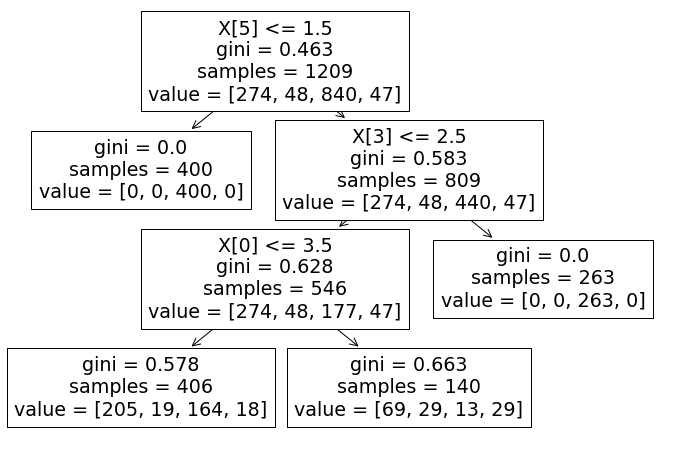

In [20]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

### Visualising Decision Tree using Graphwiz

In [23]:
y_train.unique()

array(['unacc', 'acc', 'good', 'vgood'], dtype=object)

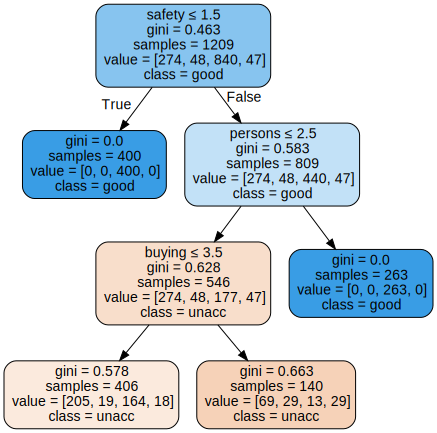

In [24]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train.unique(),  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [25]:
# Decision Tree using Entropy method
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

y_pred_en = clf_en.predict(X_test)

In [26]:
y_pred_train_en = clf_en.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Training-set accuracy score: 0.7750
Model accuracy score with criterion entropy: 0.7842


We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.

[Text(133.92000000000002, 190.26, 'X[5] <= 1.5\nentropy = 1.217\nsamples = 1209\nvalue = [274, 48, 840, 47]'),
 Text(66.96000000000001, 135.9, 'entropy = 0.0\nsamples = 400\nvalue = [0, 0, 400, 0]'),
 Text(200.88000000000002, 135.9, 'X[3] <= 2.5\nentropy = 1.487\nsamples = 809\nvalue = [274, 48, 440, 47]'),
 Text(133.92000000000002, 81.53999999999999, 'X[0] <= 3.5\nentropy = 1.639\nsamples = 546\nvalue = [274, 48, 177, 47]'),
 Text(66.96000000000001, 27.180000000000007, 'entropy = 1.432\nsamples = 406\nvalue = [205, 19, 164, 18]'),
 Text(200.88000000000002, 27.180000000000007, 'entropy = 1.762\nsamples = 140\nvalue = [69, 29, 13, 29]'),
 Text(267.84000000000003, 81.53999999999999, 'entropy = 0.0\nsamples = 263\nvalue = [0, 0, 263, 0]')]

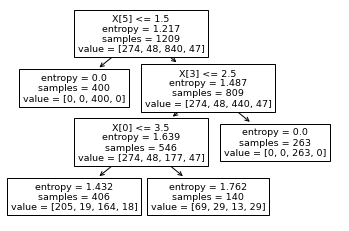

In [27]:
# Visalising the Trees
tree.plot_tree(clf_en.fit(X_train, y_train)) 

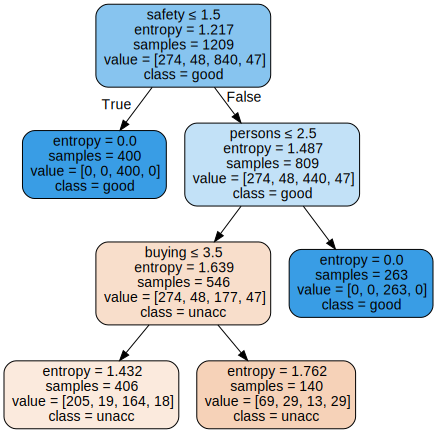

In [29]:

dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train.unique(),  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

Confusion matrix & Classification Report helps us here.

In [30]:
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n', cm)
print('\nClassification Report\n', classification_report(y_test, y_pred_en))

Confusion matrix
 [[110   0   0   0]
 [ 21   0   0   0]
 [ 73   0 297   0]
 [ 18   0   0   0]]

Classification Report
               precision    recall  f1-score   support

         acc       0.50      1.00      0.66       110
        good       0.00      0.00      0.00        21
       unacc       1.00      0.80      0.89       370
       vgood       0.00      0.00      0.00        18

    accuracy                           0.78       519
   macro avg       0.37      0.45      0.39       519
weighted avg       0.82      0.78      0.78       519



## Thanks